<a href="https://colab.research.google.com/github/bkn872/GL_Hackathon/blob/main/Socio_Economic11_09_2022_2100.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**MegaHacakthon - Voksedigital**

Socio-Economic Segregation on the basis of earnings is done by various government bodies across the world by doing a poll which can be "door to door" or "online based" to identify/

# **About:**

Socio-Economic Segregation on the basis of earnings is done by various government bodies across the world by doing a poll which can be
"door to door" or "online based" to identify/keep a check on the sections of society having lower levels of income.

Similarly in the US, it is a requirement for the federal bodies to be cognizant of people's income which falls under a 
threshold so that decisions taken on various fronts can be inclusive and without ambiguity. For this reason 
few federal bodies like the "Bureau Of Economic Analysis" outsource their masked data to 3rd party companies who are kept on contract to analyze the 
data to garner detailed insights and come up with different sets of best 
models to:

1) decide on a threshold value that can act as a good classification boundary condition.

2) to classify the people in the database based upon this threshold value.

For that reason, you are hired by one such company as an "Analyst" and are provided with the threshold value 
which is decided to be $50k/year.  
The task expected from you is to :

1) perform a detailed EDA to garner insights that can be helpful for the stakeholders.

2) to classify all the people who earn more or less than $50k/year based upon their various demographical features

   by building a generalizable classification model.

Data Dictionary :
------------------

1) index		-	Index No/Row No

2) year_of_poll		-	Year for the conducted poll

3) own_self_emp		-	Business Status( Unemployed - 0 , Business Owned - 1 , Self Employed - 2)

4) veteran benefits	-	Veteran Benefits (0 - No Benefits, 1 - Cadre1 Benefits, 2- Cadre2 Benefits)	

5) currently_enrolled	-	Current enrolled in college/school.

6) race			-	Race of people in the poll

7) father_country	-	Birth country of father 

8) educ			-	Specific education status 

9) house_stat		-	Demography in person's house 

10) major_ind_code	-	Different Industries where a person is working 

11) labour_union	-	Member of Labour Union 

12) self_country	-	Country of oneself

13) major_occ_code	-	Occupation a person performs in specific industry 

14) age			-	age of a person

15) mother_country	-	Birth country of mother 

16) house_summary	-	detailed household summary

17) gender		-	Gender of a person

18) hisp_origin		-	Origins of people in South America

19) gains		-	capital gains on investments

20) dividends		-	dividends earned from stocks 

21) marriage_status	-	Current marital status

22) losses		-   	capital losses on investments

23) employer_of		-	Number of people employed under an employer

24) house_1yr_ago	-	Living in house for under 1 yr

25) income_filled	-	Income filled for tax

26) weeks_worked	-	weeks worked in year

27) under18		-	family members under 18

28) hourly_wage		-	wage earned hourly

29) unemp_reason	- 	reason for unemployment 

30) citizenship		-	Citizenship of a person ( ' Foreign born- Not a citizen of U S ':'FB',	' Native- Born in Puerto Rico or U S Outlying':'NB_PR',' Native- Born in the United States':'NB_US',' Foreign born- U S citizen by naturalization':'FB_US',' Native- Born abroad of American Parent(s)':'NB_US_Parents') 

31) woker_type		-	Kind of worker 

32) fed_liability	-	Federal tax liability for people 

33) full_partime_job	-	type of full/part-time job

34) income		-	Less/More than 50k$ yearly

In [265]:
#datafranme related libraries
import pandas as pd
import numpy as np
#visualization libraries 
import seaborn as sns
import matplotlib.pyplot as plt

#model
from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
# import warnings
# warnings.filterwarnings("ignore", category=DeprecationWarning)
# warnings.filterwarnings("ignore", category=FutureWarning)


# pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)
# pd.set_option('display.float_format', lambda x: '%.3f' % x)
# pd.set_option('display.width', 500)


In [266]:
from google.colab import drive 
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [267]:
test_data=pd.read_csv('/content/drive/My Drive/Python/Socio_Economics/test.csv')
test_data.shape

(42000, 33)

In [268]:
train_data=pd.read_csv('/content/drive/My Drive/Python/Socio_Economics/train.csv')
train_data.shape

(105000, 34)

In [269]:
train_data.head(10).T

,0,1,2,3,4,5,6,7,8,9
ID,0,1,2,3,4,5,6,7,8,9
year_of_poll,2004,2005,2004,2004,2004,2004,2005,2004,2005,2005
own_self_emp,0,0,0,0,0,0,0,0,0,0
veteran benefits,2,0,2,2,2,0,2,2,2,2
currently_enrolled,High school,College/University,NaN,College/University,NaN,NaN,College/University,High school,College/University,High school
race,White,White,White,Amer/Indian/Aleut/Eskimo,White,White,White,White,White,White
father_country,United-States,Japan,United-States,United-States,United-States,Mexico,United-States,United-States,United-States,Puerto-Rico
educ,Associates degree-academic program,Children,Some college but no degree,High school graduate,High school graduate,Children,Some college but no degree,High school graduate,10th grade,Some college but no degree
house_stat,Householder,Child <18 never marr not in subfamily,Secondary individual,Householder,Householder,Child <18 never marr not in subfamily,Child 18+ never marr Not in a subfamily,Spouse of householder,Householder,Spouse of householder
major_ind_code,Business and repair services,Not in universe or children,Manufacturing-durable goods,Wholesale trade,Wholesale trade,Not in universe or children,Entertainment,Construction,Business and repair services,Not in universe or children


In [270]:
train_data['income'].value_counts()

Less than 50K $    65272
More than 50K $    39728
Name: income, dtype: int64

In [271]:
train_data['income']=train_data['income'].replace({'Less than 50K $':0,'More than 50K $':1})
train_data

,ID,year_of_poll,own_self_emp,veteran benefits,currently_enrolled,race,father_country,educ,house_stat,major_ind_code,...,income_filled,weeks_worked,under18,hourly_wage,unemp_reason,citizenship,woker_type,fed_liability,full_partime_job,income
0,0,2004,0,2,High school,White,United-States,Associates degree-academic program,Householder,Business and repair services,...,No,47,NaN,0.0,NaN,NB_US,Pvt,Joint_both_under65,Children/Armed_Forces,1
1,1,2005,0,0,College/University,White,Japan,Children,Child <18 never marr not in subfamily,Not in universe or children,...,No,0,Both_Pr,0.0,NaN,NB_US,NaN,Nonfiler,Children/Armed_Forces,1
2,2,2004,0,2,NaN,White,United-States,Some college but no degree,Secondary individual,Manufacturing-durable goods,...,Yes,47,NaN,0.0,NaN,NB_US,Pvt,Single,Children/Armed_Forces,1
3,3,2004,0,2,College/University,Amer/Indian/Aleut/Eskimo,United-States,High school graduate,Householder,Wholesale trade,...,NaN,47,NaN,0.0,NaN,NB_US,Pvt,Joint_both_under65,Children/Armed_Forces,1
4,4,2004,0,2,NaN,White,United-States,High school graduate,Householder,Wholesale trade,...,NaN,47,NaN,0.0,NaN,NB_US,Pvt,Single,Children/Armed_Forces,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104995,104995,2005,2,2,NaN,White,United-States,High school graduate,Householder,Not in universe or children,...,Yes,47,NaN,0.0,NaN,NB_US,NaN,Nonfiler,Not in labor force,1
104996,104996,2004,0,0,College/University,White,United-States,Children,Child <18 never marr not in subfamily,Not in universe or children,...,No,0,Both_Pr,0.0,NaN,NB_US,NaN,Nonfiler,Children/Armed_Forces,1
104997,104997,2004,0,2,NaN,White,United-States,High school graduate,Nonfamily householder,Manufacturing-nondurable goods,...,NaN,47,NaN,1693.2,NaN,NB_US,Pvt,Single,Children/Armed_Forces,1
104998,104998,2005,0,2,NaN,White,Italy,High school graduate,Nonfamily householder,Not in universe or children,...,NaN,0,NaN,0.0,NaN,NB_US,NaN,Nonfiler,Not in labor force,1


In [296]:
new_data_train=train_data.copy()
new_data_test=test_data.copy()

In [297]:
oneHotCols=[]

In [298]:
replaceStruct = {
                "currently_enrolled":     {"College/University": 1, " High school": 2,"":3," ":4},
                
                "race":     {" White": 1, " Black": 2, "Asian/Pacific_Islander":3," Other":4,"Amer/Indian/Aleut/Eskimo":5,},
                
                "father_country":     {" United-States":1," Japan":2," Mexico":3," Puerto-Rico":4," Germany":5," Philippines":6," Haiti":7," Canada":8," Dominican-Republic":9," Italy":10," Guatemala":11," Poland":12," ?":13," Cuba":14," Hungary":15," Nicaragua":16," England":17," China":18," Vietnam":19," Cambodia":20," El-Salvador":21," Ireland":22," South Korea":23," Portugal":24," Peru":25," Scotland":26," Laos":27," India":28," Yugoslavia":29," Greece":30," Columbia":31," Iran":32," Ecuador":33," France":34," Honduras":35," Jamaica":36," Outlying-U S (Guam USVI etc)":37," Taiwan":38," Thailand":39," Trinadad&Tobago":40," Hong Kong":41," Holand-Netherlands":42," Panama":43,},
               
                "educ":     {" Associates degree-academic program":1," Children":2," Some college but no degree":3," High school graduate":4," 10th grade":5," Prof school degree (MD DDS DVM LLB JD)":6," Bachelors degree(BA AB BS)":7," 7th and 8th grade":8," 5th or 6th grade":9," 9th grade":10," 11th grade":11," Masters degree(MA MS MEng MEd MSW MBA)":12," Associates degree-occup /vocational":13," 1st 2nd 3rd or 4th grade":14," Less than 1st grade":15," 12th grade no diploma":16," Doctorate degree(PhD EdD)":17,},
                
                "house_stat":{" Householder":1," Child <18 never marr not in subfamily":2," Secondary individual":3," Child 18+ never marr Not in a subfamily":4," Spouse of householder":5," Nonfamily householder":6," Other Rel 18+ never marr not in subfamily":7," Child 18+ never marr RP of subfamily":8," Child 18+ ever marr RP of subfamily":9," Other Rel <18 never marr not in subfamily":10," Other Rel 18+ ever marr not in subfamily":11," RP of unrelated subfamily":12," Other Rel <18 never marr child of subfamily RP":13," Child under 18 of RP of unrel subfamily":14," Grandchild <18 never marr child of subfamily RP":15," Other Rel 18+ spouse of subfamily RP":16," Grandchild <18 never marr not in subfamily":17," Child <18 never marr RP of subfamily":18," Other Rel 18+ ever marr RP of subfamily":19," Child <18 ever marr RP of subfamily":20," Child 18+ ever marr Not in a subfamily":21," Child 18+ spouse of subfamily RP":22," Grandchild 18+ never marr not in subfamily":23," In group quarters":24," Other Rel 18+ never marr RP of subfamily":25," Spouse of RP of unrelated subfamily":26," Grandchild 18+ ever marr not in subfamily":27," Grandchild 18+ ever marr RP of subfamily":28," Child <18 ever marr not in subfamily":29,"":30," ":31,
                              " Grandchild 18+ spouse of subfamily RP":32," Other Rel <18 never married RP of subfamily":33,},
                 
                "major_ind_code":     {" Business and repair services":1," Not in universe or children":2," Manufacturing-durable goods":3," Wholesale trade":4," Entertainment":5," Construction":6," Hospital services":7," Finance insurance and real estate":8," Personal services except private HH":9," Retail trade":10," Other professional services":11," Communications":12," Manufacturing-nondurable goods":13," Agriculture":14," Education":15," Private household services":16," Public administration":17," Medical except hospital":18," Armed Forces":19," Social services":20," Transportation":21," Forestry and fisheries":22," Mining":23," Utilities and sanitary services":24,},
                 
                "self_country":     {" United-States":1," Germany":2," Puerto-Rico":3," Philippines":4," Mexico":5," ?":6," Guatemala":7," Cuba":8," Italy":9," Vietnam":10," China":11," Canada":12," El-Salvador":13," Ireland":14," Dominican-Republic":15," South Korea":16," Portugal":17," Peru":18," Thailand":19," Taiwan":20," Japan":21," Haiti":22," Columbia":23," India":24," Cambodia":25," France":26," Poland":27," England":28," Outlying-U S (Guam USVI etc)":29," Scotland":30," Iran":31," Nicaragua":32," Honduras":33," Jamaica":34," Ecuador":35," Greece":36," Hong Kong":37," Hungary":38," Trinadad&Tobago":39," Yugoslavia":40," Laos":41," Holand-Netherlands":42," Panama":43,},
                 
                "major_occ_code":     {" Protective services":1,"":2," Machine operators assmblrs & inspctrs":3," Handlers equip cleaners etc ":4," Executive admin and managerial":5," Professional specialty":6," Adm support including clerical":7," Other service":8," Sales":9," Precision production craft & repair":10," Technicians and related support":11," Transportation and material moving":12," Farming forestry and fishing":13," Private household services":14," Armed Forces":15," ":16,},
                
                "mother_country":     {" United-States":1," Puerto-Rico":2," Philippines":3," Haiti":4," Mexico":5," Dominican-Republic":6," ?":7," Guatemala":8," Italy":9," Cuba":10," Canada":11," El-Salvador":12," Hungary":13," Nicaragua":14," England":15," Vietnam":16," China":17," Peru":18," Germany":19," Greece":20," Ireland":21," Poland":22," Japan":23," Yugoslavia":24," South Korea":25," Trinadad&Tobago":26," Portugal":27," Laos":28," Scotland":29," India":30," Columbia":31," Iran":32," France":33," Cambodia":34," Outlying-U S (Guam USVI etc)":35," Honduras":36," Jamaica":37," Ecuador":38," Thailand":39," Taiwan":40," Hong Kong":41," Holand-Netherlands":42," Panama":43,},
                
                "house_summary":     {" Householder":1,"Child_U18_Unmarried":2,"Non_Relative":3,"Child_Above18":4,"Spouse":5,"Relative":6,"Child_U18_Married":7,"Sy_Individual":8,},
                
                "gender":      {"M":1,"F":2,},
                
                "hisp_origin":  { "All_Other":1,"Mex_Amer":2," Chicano":3,"Puer_Ric":4,"Other_Spanish":5,"Central/South_American":6," Cuban":7,"Mexican_Mexicano":8," NA":9," Do not know":10,},
                
                "marriage_status":  {"Married_civilian_Sp_Pr":1,"Unmarried":2," Divorced":3," Widowed":4,"Married_AF_Sp_Pr":5,"Married_Sp_Ab":6," Separated":7,},
                 
                "house_1yr_ago":     {" No":1,"":2," Yes":3," ":4,},
                 
                "income_filled":  {" No":1," Yes":2,"":3,},
                 
                "under18":     {"":1,"Both_Pr":2,"Only_Mom":3,"Only_Dad":4,"Both_Ab":5," ":6,},   
                 
                "unemp_reason":  { "":1,"Job loser_Other":2," Job leaver":3," Re-entrant":4," New entrant":5,"Job loser_layoff":6," ":7,},
                 
                "citizenship":  { "NB_US":1,"NB_US_Parents":2,"NB_PR":3,"FB":4,"FB_US":5,},  
                 
                "woker_type":   {"Pvt":1,"":2,"St_Govt":3,"Loc_Govt":4,"Fed_Govt":5,"Self_emp_not_inc":6,"Self_emp_inc":7," Never worked":8," Without pay":9," ":10,},
                 
                "fed_liability": {"Joint_both_under65":1," Nonfiler":2," Single":3,"Joint_both_Above65":4," Head of household":5,"Joint_one_Under65_one_Above65":6,},
                 
                "full_partime_job": {"Children/Armed_Forces":1," Full-time schedules":2," Not in labor force":3,"":4," PT for econ reasons usually PT":5," PT for non-econ reasons usually FT":6," Unemployed full-time":7," Unemployed part- time":8," PT for econ reasons usually FT":9," ":10,},

                 "labour_union":{"no":1,"yes":2,"":3," ":4},  
                   
                    }

In [299]:
encoded_train_data=new_data_train.replace(replaceStruct)
encoded_train_data=pd.get_dummies(encoded_train_data, columns=oneHotCols)
#train data 


In [300]:
encoded_test_data=new_data_test.replace(replaceStruct)
encoded_test_data=pd.get_dummies(encoded_test_data, columns=oneHotCols)
#test data

In [301]:
# train data types
encoded_train_data.dtypes

ID                      int64
year_of_poll            int64
own_self_emp            int64
veteran benefits        int64
currently_enrolled    float64
race                    int64
father_country          int64
educ                    int64
house_stat            float64
major_ind_code          int64
labour_union          float64
self_country            int64
major_occ_code        float64
age                     int64
mother_country          int64
house_summary           int64
gender                  int64
hisp_origin             int64
gains                 float64
dividends             float64
marriage_status         int64
losses                float64
employer_of             int64
house_1yr_ago         float64
income_filled         float64
weeks_worked            int64
under18               float64
hourly_wage           float64
unemp_reason          float64
citizenship             int64
woker_type            float64
fed_liability           int64
full_partime_job      float64
income    

In [302]:
#test data types
encoded_test_data.dtypes

ID                      int64
year_of_poll            int64
own_self_emp            int64
veteran benefits        int64
currently_enrolled    float64
race                    int64
father_country          int64
educ                    int64
house_stat            float64
major_ind_code          int64
labour_union          float64
self_country            int64
major_occ_code        float64
age                   float64
mother_country          int64
house_summary           int64
gender                  int64
hisp_origin             int64
gains                 float64
dividends             float64
marriage_status         int64
losses                float64
employer_of             int64
house_1yr_ago         float64
income_filled         float64
weeks_worked            int64
under18               float64
hourly_wage           float64
unemp_reason          float64
citizenship             int64
woker_type            float64
fed_liability           int64
full_partime_job      float64
dtype: obj

In [303]:
# counting train data null values 
encoded_train_data.isna().sum()

ID                         0
year_of_poll               0
own_self_emp               0
veteran benefits           0
currently_enrolled     31443
race                       0
father_country             0
educ                       0
house_stat                11
major_ind_code             0
labour_union           35331
self_country               0
major_occ_code         53055
age                        0
mother_country             0
house_summary              0
gender                     0
hisp_origin                0
gains                      0
dividends                  0
marriage_status            0
losses                     0
employer_of                0
house_1yr_ago          53322
income_filled          32403
weeks_worked               0
under18                76016
hourly_wage                0
unemp_reason          101811
citizenship                0
woker_type             52835
fed_liability              0
full_partime_job        1392
income                     0
dtype: int64

In [304]:
#counting test data null types
encoded_test_data.isnull().sum()

ID                        0
year_of_poll              0
own_self_emp              0
veteran benefits          0
currently_enrolled    12613
race                      0
father_country            0
educ                      0
house_stat                3
major_ind_code            0
labour_union          14337
self_country              0
major_occ_code        21068
age                     596
mother_country            0
house_summary             0
gender                    0
hisp_origin               0
gains                     0
dividends                 0
marriage_status           0
losses                    0
employer_of               0
house_1yr_ago         21398
income_filled         13008
weeks_worked              0
under18               30340
hourly_wage               0
unemp_reason          40715
citizenship               0
woker_type            20977
fed_liability             0
full_partime_job        568
dtype: int64

this time using the ffill which help to have better data 

In [305]:
# ffill for Train data
encoded_train_data=encoded_train_data.apply(lambda x: x.fillna(method='ffill'))
encoded_train_data.isnull().sum()

ID                     0
year_of_poll           0
own_self_emp           0
veteran benefits       0
currently_enrolled     0
race                   0
father_country         0
educ                   0
house_stat             0
major_ind_code         0
labour_union           0
self_country           0
major_occ_code         0
age                    0
mother_country         0
house_summary          0
gender                 0
hisp_origin            0
gains                  0
dividends              0
marriage_status        0
losses                 0
employer_of            0
house_1yr_ago          0
income_filled          0
weeks_worked           0
under18                1
hourly_wage            0
unemp_reason          74
citizenship            0
woker_type             0
fed_liability          0
full_partime_job       0
income                 0
dtype: int64

after Ffill still two columns data have concenrn hence applying median

In [345]:
# left over data fill with median fot train data 
encoded_train_data=encoded_train_data.apply(lambda x: x.fillna(x.median(),axis=0))
encoded_train_data.isnull().sum()

ID                    0
year_of_poll          0
own_self_emp          0
veteran benefits      0
currently_enrolled    0
race                  0
father_country        0
educ                  0
house_stat            0
major_ind_code        0
labour_union          0
self_country          0
major_occ_code        0
age                   0
mother_country        0
house_summary         0
gender                0
hisp_origin           0
gains                 0
dividends             0
marriage_status       0
losses                0
employer_of           0
house_1yr_ago         0
income_filled         0
weeks_worked          0
under18               0
hourly_wage           0
unemp_reason          0
citizenship           0
woker_type            0
fed_liability         0
full_partime_job      0
income                0
dtype: int64

In [346]:
# ffill for test data
encoded_test_data=encoded_test_data.apply(lambda x: x.fillna(method='ffill'))
encoded_test_data.isnull().sum()

ID                     0
year_of_poll           0
own_self_emp           0
veteran benefits       0
currently_enrolled     0
race                   0
father_country         0
educ                   0
house_stat             0
major_ind_code         0
labour_union           2
self_country           0
major_occ_code         0
age                    0
mother_country         0
house_summary          0
gender                 0
hisp_origin            0
gains                  0
dividends              0
marriage_status        0
losses                 0
employer_of            0
house_1yr_ago          1
income_filled          0
weeks_worked           0
under18                7
hourly_wage            0
unemp_reason          28
citizenship            0
woker_type             0
fed_liability          0
full_partime_job       0
dtype: int64

after ffill still four columns showing the concern

In [347]:
# fill median for test data
encoded_test_data=encoded_test_data.apply(lambda x: x.fillna(x.median(),axis=0))
encoded_test_data.isnull().sum()

ID                    0
year_of_poll          0
own_self_emp          0
veteran benefits      0
currently_enrolled    0
race                  0
father_country        0
educ                  0
house_stat            0
major_ind_code        0
labour_union          0
self_country          0
major_occ_code        0
age                   0
mother_country        0
house_summary         0
gender                0
hisp_origin           0
gains                 0
dividends             0
marriage_status       0
losses                0
employer_of           0
house_1yr_ago         0
income_filled         0
weeks_worked          0
under18               0
hourly_wage           0
unemp_reason          0
citizenship           0
woker_type            0
fed_liability         0
full_partime_job      0
dtype: int64

lets going to Start the model building 

In [348]:
# import imblearn
# print(imblearn.__version__)

In [349]:
# for feature in encoded_train_data.columns: # Loop through all columns in the dataframe
#     if encoded_train_data[feature].dtype == 'object': # Only apply for columns with categorical strings
#         print(feature)
#         print(encoded_train_data[feature].value_counts())

In [350]:
X = encoded_train_data.drop(labels= ['income'] , axis = 1)
y = encoded_train_data["income"]
X.head()

,ID,year_of_poll,own_self_emp,veteran benefits,currently_enrolled,race,father_country,educ,house_stat,major_ind_code,...,house_1yr_ago,income_filled,weeks_worked,under18,hourly_wage,unemp_reason,citizenship,woker_type,fed_liability,full_partime_job
0,0,2004,0,2,2.0,1,1,1,1.0,1,...,1.0,1.0,47,2.0,0.0,4.0,1,1.0,1,1.0
1,1,2005,0,0,1.0,1,2,2,2.0,2,...,1.0,1.0,0,2.0,0.0,4.0,1,1.0,2,1.0
2,2,2004,0,2,1.0,1,1,3,3.0,3,...,1.0,2.0,47,2.0,0.0,4.0,1,1.0,3,1.0
3,3,2004,0,2,1.0,5,1,4,1.0,4,...,3.0,2.0,47,2.0,0.0,4.0,1,1.0,1,1.0
4,4,2004,0,2,1.0,1,1,4,1.0,4,...,3.0,2.0,47,2.0,0.0,4.0,1,1.0,3,1.0


In [351]:
X.shape

(105000, 33)

In [352]:
y.shape

(105000,)

In [353]:
# from imblearn.over_sampling import SMOTE
# from sklearn.model_selection import train_test_split
# from collections import Counter

# #X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
# sm = SMOTE(random_state=42)
# X_resampled, y_resampled = sm.fit_resample(X, y)

In [354]:
# X_resampled.shape

In [355]:
# y_resampled.shape

In [356]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.20, random_state=42)
X_train.shape, X_valid.shape, y_train.shape, y_valid.shape

((84000, 33), (21000, 33), (84000,), (21000,))

In [357]:
# X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.20, random_state=42)
# X_train.shape, X_valid.shape, y_train.shape, y_valid.shape

In [358]:
X_train.head()

,ID,year_of_poll,own_self_emp,veteran benefits,currently_enrolled,race,father_country,educ,house_stat,major_ind_code,...,house_1yr_ago,income_filled,weeks_worked,under18,hourly_wage,unemp_reason,citizenship,woker_type,fed_liability,full_partime_job
9231,9231,2005,2,2,2.0,1,1,11,3.0,6,...,3.0,1.0,15,3.0,0.0,4.0,1,1.0,3,6.0
11872,11872,2005,0,2,2.0,2,1,5,2.0,2,...,3.0,1.0,0,2.0,0.0,6.0,1,3.0,2,3.0
13085,13085,2005,0,2,1.0,1,1,17,1.0,3,...,3.0,1.0,47,2.0,0.0,2.0,1,1.0,5,2.0
33771,33771,2005,0,2,1.0,1,1,3,3.0,10,...,3.0,1.0,27,2.0,0.0,6.0,1,1.0,2,2.0
53681,53681,2004,0,2,1.0,1,1,3,5.0,2,...,1.0,2.0,27,2.0,0.0,2.0,1,1.0,1,1.0


In [359]:
std_col_names=X.columns

In [360]:
std_col_names

Index(['ID', 'year_of_poll', 'own_self_emp', 'veteran benefits',
       'currently_enrolled', 'race', 'father_country', 'educ', 'house_stat',
       'major_ind_code', 'labour_union', 'self_country', 'major_occ_code',
       'age', 'mother_country', 'house_summary', 'gender', 'hisp_origin',
       'gains', 'dividends', 'marriage_status', 'losses', 'employer_of',
       'house_1yr_ago', 'income_filled', 'weeks_worked', 'under18',
       'hourly_wage', 'unemp_reason', 'citizenship', 'woker_type',
       'fed_liability', 'full_partime_job'],
      dtype='object')

In [361]:
std_col_names=std_col_names.drop('ID')

In [362]:
X_train.set_index('ID', inplace=True)
X_valid.set_index('ID', inplace=True)

In [363]:
X_train.head()

,year_of_poll,own_self_emp,veteran benefits,currently_enrolled,race,father_country,educ,house_stat,major_ind_code,labour_union,...,house_1yr_ago,income_filled,weeks_worked,under18,hourly_wage,unemp_reason,citizenship,woker_type,fed_liability,full_partime_job
ID,,,,,,,,,,,,,,,,,,,,,
9231,2005,2,2,2.0,1,1,11,3.0,6,1.0,...,3.0,1.0,15,3.0,0.0,4.0,1,1.0,3,6.0
11872,2005,0,2,2.0,2,1,5,2.0,2,1.0,...,3.0,1.0,0,2.0,0.0,6.0,1,3.0,2,3.0
13085,2005,0,2,1.0,1,1,17,1.0,3,1.0,...,3.0,1.0,47,2.0,0.0,2.0,1,1.0,5,2.0
33771,2005,0,2,1.0,1,1,3,3.0,10,1.0,...,3.0,1.0,27,2.0,0.0,6.0,1,1.0,2,2.0
53681,2004,0,2,1.0,1,1,3,5.0,2,1.0,...,1.0,2.0,27,2.0,0.0,2.0,1,1.0,1,1.0


In [366]:
#Standardization
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train_std = pd.DataFrame(sc.fit_transform(X_train),index=X_train.index,columns = X_train.columns)
X_valid_std = pd.DataFrame(sc.fit_transform(X_valid),index=X_valid.index,columns = X_valid.columns)
#X_train_std=sc.fit_transform(X_train)
#X_test_std=sc.fit_transform(X_test)

In [367]:
X_train_std.head()

,year_of_poll,own_self_emp,veteran benefits,currently_enrolled,race,father_country,educ,house_stat,major_ind_code,labour_union,...,house_1yr_ago,income_filled,weeks_worked,under18,hourly_wage,unemp_reason,citizenship,woker_type,fed_liability,full_partime_job
ID,,,,,,,,,,,,,,,,,,,,,
9231,0.998026,3.286827,0.567717,1.168018,-0.368136,-0.362867,1.615360,-0.221138,-0.042156,-0.419888,...,0.433339,-0.541795,-0.267276,0.876293,-0.203618,0.254590,-0.344774,-0.564093,0.755629,3.432658
11872,0.998026,-0.317597,0.567717,1.168018,1.056315,-0.362867,-0.053948,-0.505417,-0.724255,-0.419888,...,0.433339,-0.541795,-0.947950,-0.557483,-0.203618,1.656692,-0.344774,0.470793,-0.110244,1.034746
13085,0.998026,-0.317597,0.567717,-0.856151,-0.368136,-0.362867,3.284668,-0.789695,-0.553730,-0.419888,...,0.433339,-0.541795,1.184829,-0.557483,-0.203618,-1.147512,-0.344774,-0.564093,2.487376,0.235443
33771,0.998026,-0.317597,0.567717,-0.856151,-0.368136,-0.362867,-0.610384,-0.221138,0.639943,-0.419888,...,0.433339,-0.541795,0.277263,-0.557483,-0.203618,1.656692,-0.344774,-0.564093,-0.110244,0.235443
53681,-1.001978,-0.317597,0.567717,-0.856151,-0.368136,-0.362867,-0.610384,0.347419,-0.724255,-0.419888,...,-2.307661,1.845717,0.277263,-0.557483,-0.203618,-1.147512,-0.344774,-0.564093,-0.976118,-0.563861


Modelling + HyperParameter Tuning

In [368]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error, confusion_matrix, classification_report, roc_curve, precision_recall_curve, roc_auc_score, accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

In [369]:
colnames = ['accuracy','accuracy_cv_score','accuracy_cv_stddev',
                'precision_score','recall_score','f1_score',
                'roc_auc_score (cross_val_score)']
model_scores = []
model_stats = {}
model_columns=['accuracy','accuracy_mean_score','accuracy_stdfev','precision','recall','f1_score']

In [370]:
model_scores = []

In [371]:

lr_model = LogisticRegression()
lr_model.fit(X_train_std, y_train)
y_pred = lr_model.predict(X_valid_std)

# evaluate accuracy
print('accuracy score for Logistic Regression',accuracy_score(y_valid, y_pred))
predictions=lr_model.predict(X_valid_std)
lr_model.score(X_valid_std, y_valid)
model_scores.append(lr_model.score(X_valid_std, y_valid))
model_scores.append('NA')
model_scores.append('NA')

predictions_train=lr_model.predict(X_train_std)
print('accuracy score when Logistic Regression -Training set',accuracy_score(y_train, predictions_train))

accuracy score for Logistic Regression 0.6366666666666667
accuracy score when Logistic Regression -Training set 0.6366904761904761


In [372]:
from sklearn.metrics import precision_score, recall_score, roc_auc_score

In [373]:
 #important
 # calculate precision and recall
p = precision_score(y_valid, predictions)
r = recall_score(y_valid, predictions)
model_scores.append(p)
model_scores.append(r)
print('precision',p)
print('recall',r)
 # calculate F1 score
f1_score = 2*(p*r)/(p+r)
model_scores.append(f1_score)
print('f1_score',f1_score)

precision 0.6987542468856173
recall 0.07730860794386668
f1_score 0.13921480144404333


In [374]:
 model_stats['LogisticRegression Basic Model'] = model_scores

In [375]:
# df_model_stats = pd.DataFrame.from_dict(model_stats, orient='index', columns=model_columns)

In [376]:
df_model_stats

,accuracy,accuracy_mean_score,accuracy_stdfev,precision,recall,f1_score
LogisticRegression Basic Model,0.638095,NA,NA,0.703308,0.082571,0.147791


In [380]:
encoded_test_data.head()

,ID,year_of_poll,own_self_emp,veteran benefits,currently_enrolled,race,father_country,educ,house_stat,major_ind_code,...,house_1yr_ago,income_filled,weeks_worked,under18,hourly_wage,unemp_reason,citizenship,woker_type,fed_liability,full_partime_job
0,105000,2005,0,2,1.0,1,1,3,1.0,13,...,3.0,1.0,47,2.0,0.0,4.0,1,1.0,1,2.0
1,105001,2004,0,2,1.0,1,1,7,6.0,18,...,3.0,1.0,47,2.0,0.0,4.0,1,1.0,3,1.0
2,105002,2004,0,2,1.0,1,1,8,24.0,2,...,3.0,1.0,0,2.0,0.0,4.0,1,1.0,2,1.0
3,105003,2004,2,2,1.0,1,1,4,3.0,13,...,1.0,1.0,47,2.0,0.0,4.0,1,1.0,3,1.0
4,105004,2004,0,2,1.0,1,32,17,1.0,17,...,3.0,1.0,47,2.0,0.0,4.0,5,4.0,3,1.0


In [381]:
# evaluate accuracy
print('accuracy score when Logistic Regression',accuracy_score(y_valid, predictions))
#print('accuracy score Train when Logistic Regression',accuracy_score(y_train, predictions))
print(classification_report(y_valid, predictions))

accuracy score when Logistic Regression 0.6366666666666667
              precision    recall  f1-score   support

           0       0.63      0.98      0.77     13019
           1       0.70      0.08      0.14      7981

    accuracy                           0.64     21000
   macro avg       0.67      0.53      0.45     21000
weighted avg       0.66      0.64      0.53     21000



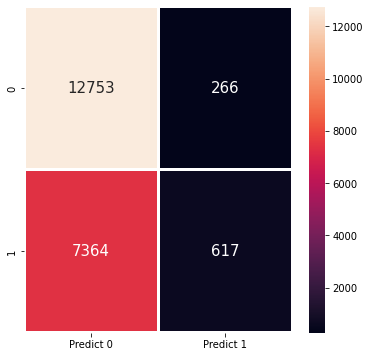

In [384]:
# calculate accuracy measures and confusion matrix
cm=metrics.confusion_matrix(y_valid, predictions, labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["0","1"]],
                  columns = [i for i in ["Predict 0","Predict 1"]])
plt.figure(figsize = (6,6))
sns.heatmap(df_cm, annot=True,linewidths=2, linecolor='white', fmt='g', annot_kws={"size":15}) 

In [383]:
encoded_test_data.columns

Index(['ID', 'year_of_poll', 'own_self_emp', 'veteran benefits',
       'currently_enrolled', 'race', 'father_country', 'educ', 'house_stat',
       'major_ind_code', 'labour_union', 'self_country', 'major_occ_code',
       'age', 'mother_country', 'house_summary', 'gender', 'hisp_origin',
       'gains', 'dividends', 'marriage_status', 'losses', 'employer_of',
       'house_1yr_ago', 'income_filled', 'weeks_worked', 'under18',
       'hourly_wage', 'unemp_reason', 'citizenship', 'woker_type',
       'fed_liability', 'full_partime_job'],
      dtype='object')

In [385]:
encoded_test_data.head()

,ID,year_of_poll,own_self_emp,veteran benefits,currently_enrolled,race,father_country,educ,house_stat,major_ind_code,...,house_1yr_ago,income_filled,weeks_worked,under18,hourly_wage,unemp_reason,citizenship,woker_type,fed_liability,full_partime_job
0,105000,2005,0,2,1.0,1,1,3,1.0,13,...,3.0,1.0,47,2.0,0.0,4.0,1,1.0,1,2.0
1,105001,2004,0,2,1.0,1,1,7,6.0,18,...,3.0,1.0,47,2.0,0.0,4.0,1,1.0,3,1.0
2,105002,2004,0,2,1.0,1,1,8,24.0,2,...,3.0,1.0,0,2.0,0.0,4.0,1,1.0,2,1.0
3,105003,2004,2,2,1.0,1,1,4,3.0,13,...,1.0,1.0,47,2.0,0.0,4.0,1,1.0,3,1.0
4,105004,2004,0,2,1.0,1,32,17,1.0,17,...,3.0,1.0,47,2.0,0.0,4.0,5,4.0,3,1.0


In [386]:
encoded_test_data.set_index('ID', inplace=True)

In [387]:
temp_df=encoded_test_data.copy()

In [388]:
enc_test=temp_df.copy()

In [389]:
std_test_data = pd.DataFrame(sc.fit_transform(enc_test),index=enc_test.index,columns = enc_test.columns)
std_test_data

,year_of_poll,own_self_emp,veteran benefits,currently_enrolled,race,father_country,educ,house_stat,major_ind_code,labour_union,...,house_1yr_ago,income_filled,weeks_worked,under18,hourly_wage,unemp_reason,citizenship,woker_type,fed_liability,full_partime_job
ID,,,,,,,,,,,,,,,,,,,,,
105000,0.996150,-0.312687,0.570895,-0.856841,-0.36957,-0.362631,-0.607207,-0.789434,1.142260,-0.425873,...,0.437402,-0.530238,1.177196,-0.556224,-0.206478,0.263370,-0.341467,-0.569539,-0.975316,0.248792
105001,-1.003865,-0.312687,0.570895,-0.856841,-0.36957,-0.362631,0.509043,0.631117,1.991897,-0.425873,...,0.437402,-0.530238,1.177196,-0.556224,-0.206478,0.263370,-0.341467,-0.569539,0.770997,-0.564698
105002,-1.003865,-0.312687,0.570895,-0.856841,-0.36957,-0.362631,0.788106,5.745104,-0.726941,-0.425873,...,0.437402,-0.530238,-0.953064,-0.556224,-0.206478,0.263370,-0.341467,-0.569539,-0.102159,-0.564698
105003,-1.003865,3.337865,0.570895,-0.856841,-0.36957,-0.362631,-0.328144,-0.221214,1.142260,-0.425873,...,-2.286227,-0.530238,1.177196,-0.556224,-0.206478,0.263370,-0.341467,-0.569539,0.770997,-0.564698
105004,-1.003865,-0.312687,0.570895,-0.856841,-0.36957,4.719228,3.299668,-0.789434,1.821970,2.348116,...,0.437402,-0.530238,1.177196,-0.556224,-0.206478,0.263370,3.689910,0.968963,0.770997,-0.564698
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149995,-1.003865,-0.312687,-1.776512,1.167078,-0.36957,-0.034769,-0.886269,-0.505324,-0.726941,-0.425873,...,0.437402,-0.530238,-0.953064,-0.556224,-0.206478,-1.129595,-0.341467,-0.569539,-0.102159,-0.564698
149996,-1.003865,-0.312687,0.570895,1.167078,-0.36957,1.112748,-0.607207,-0.789434,-0.557014,-0.425873,...,0.437402,-0.530238,1.177196,-0.556224,-0.206478,-1.129595,2.682066,-0.569539,-0.975316,-0.564698
149997,0.996150,-0.312687,-1.776512,-0.856841,-0.36957,-0.362631,-0.886269,-0.505324,-0.726941,-0.425873,...,0.437402,-0.530238,-0.953064,0.902405,-0.206478,-1.129595,-0.341467,-0.569539,-0.102159,-0.564698


# Very very important point model deployment is happening here

In [390]:
predictions_test=lr_model.predict(std_test_data)

In [391]:
std_test_data['income']=predictions_test

In [392]:
std_test_data.head()

,year_of_poll,own_self_emp,veteran benefits,currently_enrolled,race,father_country,educ,house_stat,major_ind_code,labour_union,...,income_filled,weeks_worked,under18,hourly_wage,unemp_reason,citizenship,woker_type,fed_liability,full_partime_job,income
ID,,,,,,,,,,,,,,,,,,,,,
105000,0.996150,-0.312687,0.570895,-0.856841,-0.36957,-0.362631,-0.607207,-0.789434,1.142260,-0.425873,...,-0.530238,1.177196,-0.556224,-0.206478,0.26337,-0.341467,-0.569539,-0.975316,0.248792,0
105001,-1.003865,-0.312687,0.570895,-0.856841,-0.36957,-0.362631,0.509043,0.631117,1.991897,-0.425873,...,-0.530238,1.177196,-0.556224,-0.206478,0.26337,-0.341467,-0.569539,0.770997,-0.564698,0
105002,-1.003865,-0.312687,0.570895,-0.856841,-0.36957,-0.362631,0.788106,5.745104,-0.726941,-0.425873,...,-0.530238,-0.953064,-0.556224,-0.206478,0.26337,-0.341467,-0.569539,-0.102159,-0.564698,0
105003,-1.003865,3.337865,0.570895,-0.856841,-0.36957,-0.362631,-0.328144,-0.221214,1.142260,-0.425873,...,-0.530238,1.177196,-0.556224,-0.206478,0.26337,-0.341467,-0.569539,0.770997,-0.564698,0
105004,-1.003865,-0.312687,0.570895,-0.856841,-0.36957,4.719228,3.299668,-0.789434,1.821970,2.348116,...,-0.530238,1.177196,-0.556224,-0.206478,0.26337,3.689910,0.968963,0.770997,-0.564698,0


In [393]:
final_df=pd.DataFrame(std_test_data['income'],index=std_test_data.index)


In [394]:
final_df.head()

,income
ID,
105000,0
105001,0
105002,0
105003,0
105004,0


In [395]:
final_df.value_counts()

income
0         40054
1          1946
dtype: int64

In [396]:
final_df.to_csv("/content/drive/My Drive/Python/Socio_Economics/model1.csv", encoding='utf-8', index=True)

# Model 2

In [397]:
logistic_regression_model = LogisticRegression()
logistic_regression_model.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [398]:
X_train_std.shape

(84000, 32)

In [399]:

from sklearn.model_selection import GridSearchCV

# defining parameter range
param_grid = {'penalty': ['l1', 'l2'],'C':[0.001,.009,0.01,.09,1,5,10,25]}
 
grid = GridSearchCV(logistic_regression_model, param_grid, refit = True, verbose = 3)

# fitting the model for grid search
grid.fit(X_train_std, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV 1/5] END .................C=0.001, penalty=l1;, score=nan total time=   0.0s
[CV 2/5] END .................C=0.001, penalty=l1;, score=nan total time=   0.0s
[CV 3/5] END .................C=0.001, penalty=l1;, score=nan total time=   0.0s
[CV 4/5] END .................C=0.001, penalty=l1;, score=nan total time=   0.0s
[CV 5/5] END .................C=0.001, penalty=l1;, score=nan total time=   0.0s
[CV 1/5] END ...............C=0.001, penalty=l2;, score=0.637 total time=   0.3s
[CV 2/5] END ...............C=0.001, penalty=l2;, score=0.636 total time=   0.3s
[CV 3/5] END ...............C=0.001, penalty=l2;, score=0.636 total time=   0.3s
[CV 4/5] END ...............C=0.001, penalty=l2;, score=0.637 total time=   0.3s
[CV 5/5] END ...............C=0.001, penalty=l2;, score=0.636 total time=   0.3s
[CV 1/5] END .................C=0.009, penalty=l1;, score=nan total time=   0.0s
[CV 2/5] END .................C=0.009, penalty=l

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
40 fits failed out of a total of 80.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
40 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 449, in _check_solver
    % (solver, penalty)
ValueError: Solver

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.009, 0.01, 0.09, 1, 5, 10, 25],
                         'penalty': ['l1', 'l2']},
             verbose=3)

In [400]:
##print best parameter after tuning
print(grid.best_params_)
 
# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

{'C': 1, 'penalty': 'l2'}
LogisticRegression(C=1)


In [401]:
grid.score(X_valid_std, y_valid)

0.6366666666666667

In [402]:
model_scores = []
model_scores.append(grid.score(X_valid_std, y_valid))


In [403]:
std_test_data=std_test_data.drop(labels='income', axis=1)
std_test_data.shape

(42000, 32)

In [405]:
std_test_data.head()

,year_of_poll,own_self_emp,veteran benefits,currently_enrolled,race,father_country,educ,house_stat,major_ind_code,labour_union,...,house_1yr_ago,income_filled,weeks_worked,under18,hourly_wage,unemp_reason,citizenship,woker_type,fed_liability,full_partime_job
ID,,,,,,,,,,,,,,,,,,,,,
105000,0.996150,-0.312687,0.570895,-0.856841,-0.36957,-0.362631,-0.607207,-0.789434,1.142260,-0.425873,...,0.437402,-0.530238,1.177196,-0.556224,-0.206478,0.26337,-0.341467,-0.569539,-0.975316,0.248792
105001,-1.003865,-0.312687,0.570895,-0.856841,-0.36957,-0.362631,0.509043,0.631117,1.991897,-0.425873,...,0.437402,-0.530238,1.177196,-0.556224,-0.206478,0.26337,-0.341467,-0.569539,0.770997,-0.564698
105002,-1.003865,-0.312687,0.570895,-0.856841,-0.36957,-0.362631,0.788106,5.745104,-0.726941,-0.425873,...,0.437402,-0.530238,-0.953064,-0.556224,-0.206478,0.26337,-0.341467,-0.569539,-0.102159,-0.564698
105003,-1.003865,3.337865,0.570895,-0.856841,-0.36957,-0.362631,-0.328144,-0.221214,1.142260,-0.425873,...,-2.286227,-0.530238,1.177196,-0.556224,-0.206478,0.26337,-0.341467,-0.569539,0.770997,-0.564698
105004,-1.003865,-0.312687,0.570895,-0.856841,-0.36957,4.719228,3.299668,-0.789434,1.821970,2.348116,...,0.437402,-0.530238,1.177196,-0.556224,-0.206478,0.26337,3.689910,0.968963,0.770997,-0.564698


In [406]:
std_test_data_pred_2=std_test_data.copy()
std_test_data_pred_2.shape

(42000, 32)

In [407]:
std_test_data_pred_2.columns

Index(['year_of_poll', 'own_self_emp', 'veteran benefits',
       'currently_enrolled', 'race', 'father_country', 'educ', 'house_stat',
       'major_ind_code', 'labour_union', 'self_country', 'major_occ_code',
       'age', 'mother_country', 'house_summary', 'gender', 'hisp_origin',
       'gains', 'dividends', 'marriage_status', 'losses', 'employer_of',
       'house_1yr_ago', 'income_filled', 'weeks_worked', 'under18',
       'hourly_wage', 'unemp_reason', 'citizenship', 'woker_type',
       'fed_liability', 'full_partime_job'],
      dtype='object')

In [408]:
predictions_2=grid.predict(std_test_data)

In [409]:
std_test_data_pred_2['income/No income']=predictions_2

In [410]:
std_test_data_pred_2.head()

,year_of_poll,own_self_emp,veteran benefits,currently_enrolled,race,father_country,educ,house_stat,major_ind_code,labour_union,...,income_filled,weeks_worked,under18,hourly_wage,unemp_reason,citizenship,woker_type,fed_liability,full_partime_job,income/No income
ID,,,,,,,,,,,,,,,,,,,,,
105000,0.996150,-0.312687,0.570895,-0.856841,-0.36957,-0.362631,-0.607207,-0.789434,1.142260,-0.425873,...,-0.530238,1.177196,-0.556224,-0.206478,0.26337,-0.341467,-0.569539,-0.975316,0.248792,0
105001,-1.003865,-0.312687,0.570895,-0.856841,-0.36957,-0.362631,0.509043,0.631117,1.991897,-0.425873,...,-0.530238,1.177196,-0.556224,-0.206478,0.26337,-0.341467,-0.569539,0.770997,-0.564698,0
105002,-1.003865,-0.312687,0.570895,-0.856841,-0.36957,-0.362631,0.788106,5.745104,-0.726941,-0.425873,...,-0.530238,-0.953064,-0.556224,-0.206478,0.26337,-0.341467,-0.569539,-0.102159,-0.564698,0
105003,-1.003865,3.337865,0.570895,-0.856841,-0.36957,-0.362631,-0.328144,-0.221214,1.142260,-0.425873,...,-0.530238,1.177196,-0.556224,-0.206478,0.26337,-0.341467,-0.569539,0.770997,-0.564698,0
105004,-1.003865,-0.312687,0.570895,-0.856841,-0.36957,4.719228,3.299668,-0.789434,1.821970,2.348116,...,-0.530238,1.177196,-0.556224,-0.206478,0.26337,3.689910,0.968963,0.770997,-0.564698,0


In [411]:
final_df2=pd.DataFrame(std_test_data_pred_2['income/No income'],index=std_test_data_pred_2.index)

In [412]:
final_df2.head()


,income/No income
ID,
105000,0
105001,0
105002,0
105003,0
105004,0


In [413]:
final_df2['income/No income'].value_counts()

0    40054
1     1946
Name: income/No income, dtype: int64

In [414]:
final_df2.to_csv("/content/drive/My Drive/Python/Socio_Economics/model2.csv", index=True)

#Model3

In [426]:
# instantiate learning model (k = 30)
knn = KNeighborsClassifier(n_neighbors=3)

# fitting the model
knn.fit(X_train_std, y_train)


KNeighborsClassifier(n_neighbors=3)

In [427]:

# predict the response
y_pred = knn.predict(X_valid_std)
# evaluate accuracy
print('accuracy score when k=3',accuracy_score(y_valid, y_pred))

accuracy score when k=3 0.5652380952380952


In [428]:
std_test_data.shape

(42000, 32)

In [429]:
std_test_data_pred_3=std_test_data.copy()

predictions_3=knn.predict(std_test_data)
std_test_data_pred_3['income']=predictions_3
final_df3=pd.DataFrame(std_test_data_pred_3['income'],index=std_test_data_pred_3.index)
final_df3.head()


,income
ID,
105000,0
105001,0
105002,0
105003,0
105004,1


In [430]:
final_df3['income'].value_counts()

0    28511
1    13489
Name: income, dtype: int64

In [431]:
final_df3.to_csv("/content/drive/My Drive/Python/Socio_Economics/model20resuls.csv", encoding='utf-8', index=True)